In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import Input
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import splitfolders
import os   # 리눅스를 파이썬에서 쓰고 싶을 때
import cv2
import matplotlib.cm as cm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.model_selection import train_test_split
import pandas as pd

## 모델구축 ResNet50 & vgg16 & 

In [ ]:
base_model = ResNet50(include_top=False, input_shape = (224, 224, 3), weights = 'imagenet')

In [ ]:
base_model = VGG16(include_top=False, input_shape = (224, 224, 3), weights = 'imagenet')

In [ ]:
base_model = EfficientNetB7(include_top=False, input_shape = (224,224 ,3), weights = 'imagenet')

In [ ]:
base_model.trainable =True
# 전체를 True로 하고 일부만 봉쇄
for layer in base_model.layers[:-20]: 
  layer.trainable = False				

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
# x = tf.keras.layers.Dense(256, activation='relu')(x)
# x= tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
# x= tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

## 저장

In [ ]:
!mkdir training_1

mkdir: cannot create directory ‘training_1’: File exists


In [ ]:
checkpoint_path = "/content/training_1/cp-{epoch:04d}.ckpt"   # ckpt : check point 확장자
checkpoint_dir = os.path.dirname(checkpoint_path) # 현재 경로 폴더 반환
checkpoint_dir

'/content/training_1'

In [ ]:
# 모델의 가중치를 저장하는 체크포인트 콜백 선언
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=True, # False면 모델 레이어 및 weight값 모두
    # save_freq=5 # 체크포인트 저장하는 에폭주기 설정 가능
    )

## 그래프 그리기

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout
    #plt.style.use('fivethirtyeight')
    plt.show()

Epoch 1/30
200/200 [==============================] - 60s 254ms/step - loss: 0.8575 - accuracy: 0.6367 - val_loss: 0.8052 - val_accuracy: 0.6220
Epoch 2/30
200/200 [==============================] - 48s 242ms/step - loss: 0.5801 - accuracy: 0.7563 - val_loss: 0.5951 - val_accuracy: 0.7425
Epoch 3/30
200/200 [==============================] - 48s 240ms/step - loss: 0.4623 - accuracy: 0.8139 - val_loss: 0.5985 - val_accuracy: 0.7472
Epoch 4/30
200/200 [==============================] - 48s 242ms/step - loss: 0.4071 - accuracy: 0.8376 - val_loss: 0.4804 - val_accuracy: 0.8028
Epoch 5/30
200/200 [==============================] - 48s 242ms/step - loss: 0.3492 - accuracy: 0.8625 - val_loss: 0.4755 - val_accuracy: 0.7940
Epoch 6/30
200/200 [==============================] - 48s 240ms/step - loss: 0.3033 - accuracy: 0.8797 - val_loss: 0.4888 - val_accuracy: 0.7981
Epoch 7/30
200/200 [==============================] - 48s 240ms/step - loss: 0.2452 - accuracy: 0.9070 - val_loss: 0.4851 - val_ac

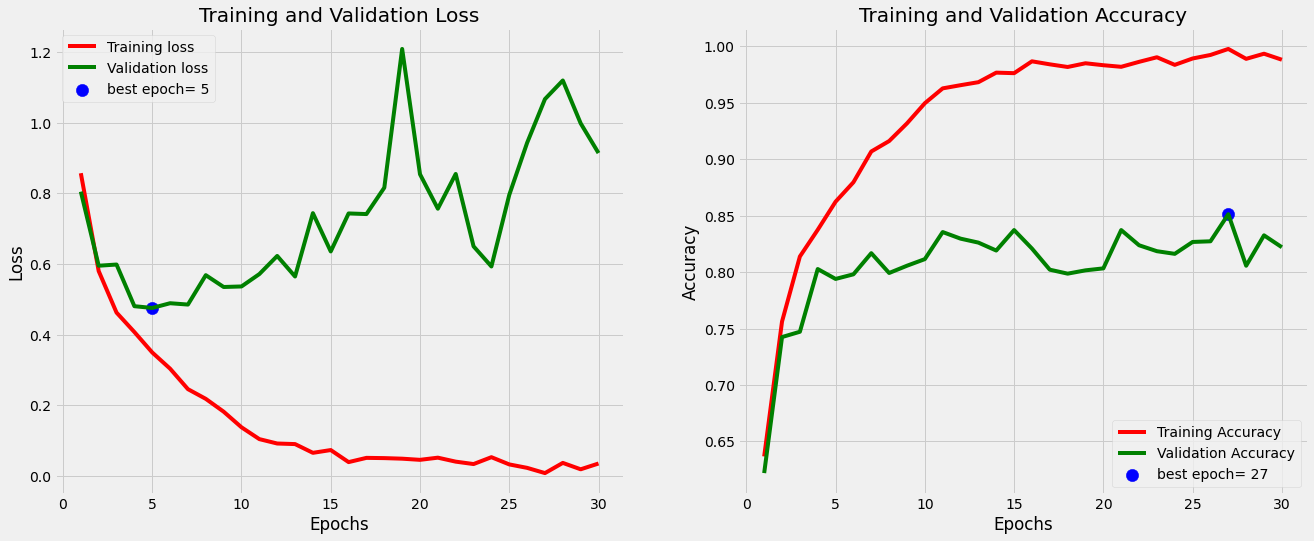

In [ ]:
tr_plot( model.fit(x_train, y_train, epochs = 30, validation_data=(x_val, y_val), batch_size= 32, callbacks=[cp_callback]), 0)

In [ ]:
#모델 검증
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

54/54 - 5s - loss: 0.8765 - accuracy: 0.8301 - 5s/epoch - 85ms/step
0.8301225900650024


## 모델 불러오기

In [ ]:
model.load_weights('/content/training_3/cp.ckpt')

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]: 
    layer.trainable = False


inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) 

x = tf.keras.layers.Flatten(input_shape=model.output_shape[1:])(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])